In [1]:
import urllib
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import statsmodels.api as sn
from turtle import color
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from numpy.random import seed

In [2]:
data = pd.read_excel('D:/Hafizh/STATISTIKA UNPAD/SEM 7/Export Nonmigas - Update Mar24.xlsx', parse_dates=True)
data.index.freq='MS'
data.head()

,Time,Nonmigas
0,1993-01-01,2137.6
1,1993-02-01,2125.0
2,1993-03-01,2116.3
3,1993-04-01,2213.5
4,1993-05-01,2229.7


In [3]:
data

,Time,Nonmigas
0,1993-01-01,2137.6
1,1993-02-01,2125.0
2,1993-03-01,2116.3
3,1993-04-01,2213.5
4,1993-05-01,2229.7
...,...,...
370,2023-11-01,20715.3
371,2023-12-01,20913.2
372,2024-01-01,19096.5
373,2024-02-01,18056.7


In [4]:
data['Time'] = pd.to_datetime(data['Time'])

Text(0.5, 1.0, 'Nilai Ekspor Nonmigas Indonesia')

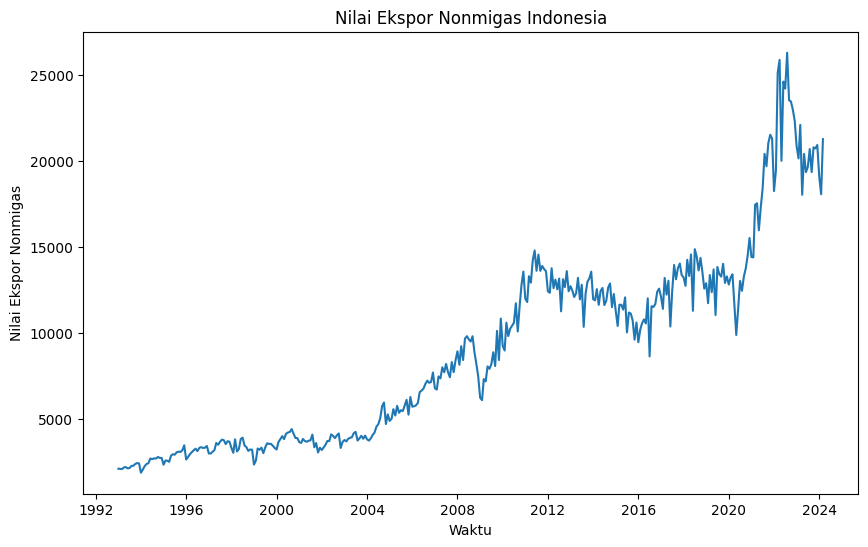

In [5]:
plt.figure(figsize=(10,6))
plt.plot(data['Time'], data['Nonmigas'])
plt.xlabel('Waktu')
plt.ylabel('Nilai Ekspor Nonmigas')
plt.title("Nilai Ekspor Nonmigas Indonesia")

Visualisasi Splitting Data

In [6]:
#Training dan Testing
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]
print("Jumlah data training :", len(train_data))
print("Jumlah data testing :", len(test_data))

Jumlah data training : 300
Jumlah data testing : 75


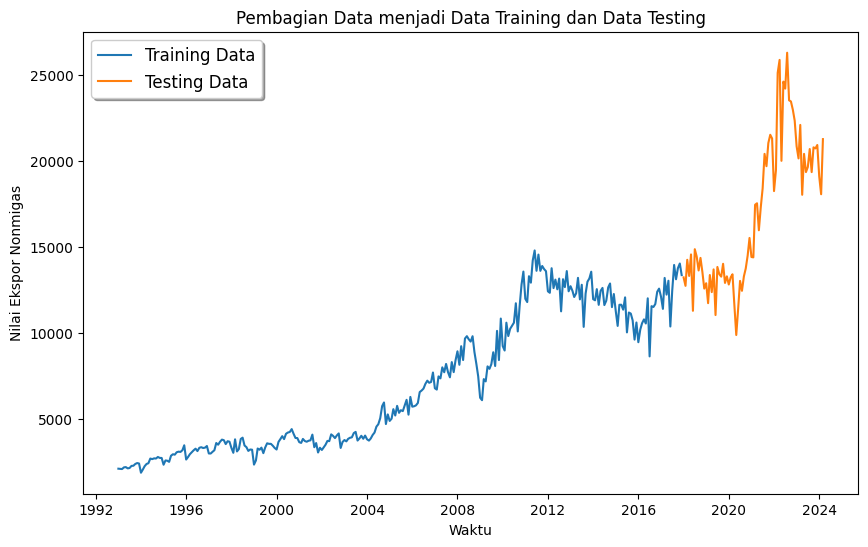

In [7]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Time", y="Nonmigas",
             data=train_data, label='Training Data')
sns.lineplot(x="Time", y="Nonmigas",
             data=test_data, label='Testing Data')
plt.title("Pembagian Data menjadi Data Training dan Data Testing")
plt.xlabel('Waktu')
plt.ylabel('Nilai Ekspor Nonmigas')
plt.legend(loc='upper left', prop={'size': 12}, shadow=True)

Autokorelasi

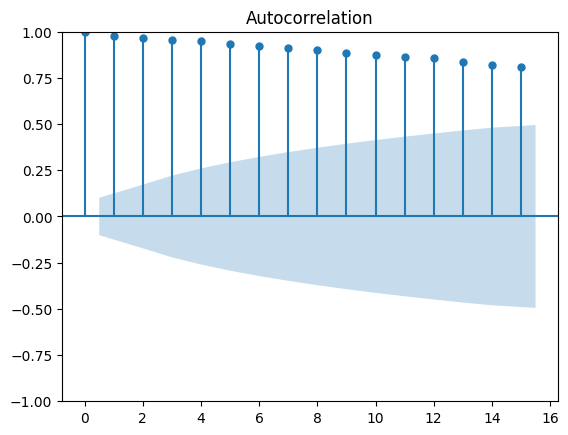

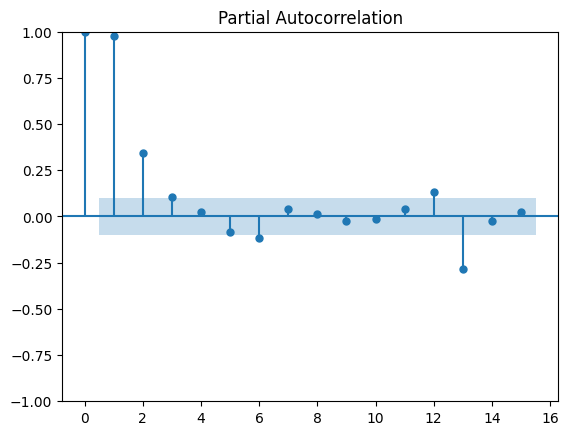

In [8]:
sn.graphics.tsa.plot_acf(data['Nonmigas'], lags=15)
sn.graphics.tsa.plot_pacf(data['Nonmigas'], lags=15)
plt.show()

Normalisasi

In [12]:
df = data['Nonmigas'].values.reshape(-1, 1)

In [13]:
df

array([[ 2137.6],
       [ 2125. ],
       [ 2116.3],
       [ 2213.5],
       [ 2229.7],
       [ 2155.3],
       [ 2178.4],
       [ 2299.7],
       [ 2308.8],
       [ 2411.3],
       [ 2464.2],
       [ 2437.3],
       [ 1903.2],
       [ 2093. ],
       [ 2280.5],
       [ 2410.8],
       [ 2453.3],
       [ 2725.2],
       [ 2692.1],
       [ 2735.7],
       [ 2726.6],
       [ 2817.3],
       [ 2762.3],
       [ 2759.7],
       [ 2367.3],
       [ 2614.4],
       [ 2600.9],
       [ 2533.3],
       [ 2886. ],
       [ 2975.7],
       [ 2949.8],
       [ 3090.4],
       [ 3125.2],
       [ 3108.7],
       [ 3206.8],
       [ 3495.2],
       [ 2667.9],
       [ 2817.1],
       [ 2977.3],
       [ 3090.4],
       [ 3204.5],
       [ 3298.3],
       [ 3157.9],
       [ 3349.3],
       [ 3383.2],
       [ 3336.9],
       [ 3357.1],
       [ 3452.8],
       [ 3020.2],
       [ 3017.8],
       [ 3113.2],
       [ 3207.3],
       [ 3625.8],
       [ 3527.9],
       [ 3698.2],
       [ 3

In [14]:
#Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(df)

In [15]:
normalized_data

array([[0.0096213 ],
       [0.00910412],
       [0.00874701],
       [0.01273674],
       [0.01340169],
       [0.01034783],
       [0.011296  ],
       [0.01627495],
       [0.01664847],
       [0.02085574],
       [0.0230271 ],
       [0.02192295],
       [0.        ],
       [0.00779063],
       [0.01548685],
       [0.02083521],
       [0.02257969],
       [0.03374024],
       [0.0323816 ],
       [0.03417123],
       [0.03379771],
       [0.03752063],
       [0.03526307],
       [0.03515635],
       [0.01904969],
       [0.02919229],
       [0.02863816],
       [0.02586341],
       [0.04034052],
       [0.04402239],
       [0.04295929],
       [0.04873043],
       [0.05015885],
       [0.04948158],
       [0.05350825],
       [0.06534606],
       [0.03138828],
       [0.03751242],
       [0.04408807],
       [0.04873043],
       [0.05341384],
       [0.057264  ],
       [0.05150107],
       [0.05935738],
       [0.06074885],
       [0.0588484 ],
       [0.05967754],
       [0.063

Splitting Data

In [16]:
#Training dan Testing
train_size = int(len(normalized_data) * 0.8)
train_data = normalized_data[:train_size, :]
test_data = normalized_data[train_size:, :]
print("Jumlah data training :", len(train_data))
print("Jumlah data testing :", len(test_data))

Jumlah data training : 300
Jumlah data testing : 75


In [17]:
train_data

array([[0.0096213 ],
       [0.00910412],
       [0.00874701],
       [0.01273674],
       [0.01340169],
       [0.01034783],
       [0.011296  ],
       [0.01627495],
       [0.01664847],
       [0.02085574],
       [0.0230271 ],
       [0.02192295],
       [0.        ],
       [0.00779063],
       [0.01548685],
       [0.02083521],
       [0.02257969],
       [0.03374024],
       [0.0323816 ],
       [0.03417123],
       [0.03379771],
       [0.03752063],
       [0.03526307],
       [0.03515635],
       [0.01904969],
       [0.02919229],
       [0.02863816],
       [0.02586341],
       [0.04034052],
       [0.04402239],
       [0.04295929],
       [0.04873043],
       [0.05015885],
       [0.04948158],
       [0.05350825],
       [0.06534606],
       [0.03138828],
       [0.03751242],
       [0.04408807],
       [0.04873043],
       [0.05341384],
       [0.057264  ],
       [0.05150107],
       [0.05935738],
       [0.06074885],
       [0.0588484 ],
       [0.05967754],
       [0.063

In [18]:
# Mengubah data menjadi bentuk untuk GRU
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 12
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

# Reshape Input
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1],1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [19]:
print(train_X.shape)
print(test_X.shape)

(288, 12, 1)
(63, 12, 1)


VANILLA GRU

In [20]:
model_GRU = tf.keras.models.Sequential([
    tf.keras.layers.GRU(128, activation='tanh', return_sequences=True,input_shape=(look_back, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
    ])

model_GRU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 12, 128)           50304     
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 1)                 1537      
                                                                 
Total params: 51841 (202.50 KB)
Trainable params: 51841 (202.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss=tf.losses.Huber()

model_GRU.compile(loss=loss,
                optimizer=optimizer,
                metrics=['mae']
                )

In [22]:
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=15,verbose=1,restore_best_weights=True)
mc=tf.keras.callbacks.ModelCheckpoint('./GRU_0.01/ForecastNonmigas_Model_GRU_128_BS16.h5', monitor='val_loss', mode='min',verbose=1, save_best_only=True)
history_GRU=model_GRU.fit(train_X, train_Y, epochs=200,batch_size=16,callbacks=[estop,mc],validation_data=(test_X,test_Y))

Epoch 1/200
16/18 [=========================>....] - ETA: 0s - loss: 0.0086 - mae: 0.0988
Epoch 1: val_loss improved from inf to 0.00797, saving model to ./GRU_0.01\ForecastNonmigas_Model_GRU_128_BS16.h5
18/18 [==============================] - 3s 44ms/step - loss: 0.0078 - mae: 0.0924 - val_loss: 0.0080 - val_mae: 0.1082
Epoch 2/200
 8/18 [============>.................] - ETA: 0s - loss: 0.0019 - mae: 0.0527
Epoch 2: val_loss improved from 0.00797 to 0.00444, saving model to ./GRU_0.01\ForecastNonmigas_Model_GRU_128_BS16.h5


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 0s 10ms/step - loss: 0.0015 - mae: 0.0436 - val_loss: 0.0044 - val_mae: 0.0744
Epoch 3/200
13/18 [====================>.........] - ETA: 0s - loss: 6.9222e-04 - mae: 0.0260
Epoch 3: val_loss improved from 0.00444 to 0.00415, saving model to ./GRU_0.01\ForecastNonmigas_Model_GRU_128_BS16.h5
18/18 [==============================] - 0s 8ms/step - loss: 6.4725e-04 - mae: 0.0253 - val_loss: 0.0042 - val_mae: 0.0721
Epoch 4/200
11/18 [=================>............] - ETA: 0s - loss: 5.6265e-04 - mae: 0.0234
Epoch 4: val_loss improved from 0.00415 to 0.00403, saving model to ./GRU_0.01\ForecastNonmigas_Model_GRU_128_BS16.h5
18/18 [==============================] - 0s 8ms/step - loss: 6.2361e-04 - mae: 0.0245 - val_loss: 0.0040 - val_mae: 0.0667
Epoch 5/200
10/18 [===============>..............] - ETA: 0s - loss: 7.3805e-04 - mae: 0.0287
Epoch 5: val_loss improved from 0.00403 to 0.00382, saving model to ./GRU_0.01\ForecastNonmigas_Model_GRU_128_BS16.h

Plot Training vs Testing

In [23]:
#Pot training vs testing
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Training vs Testing {metric}")
    plt.legend([f'Training Loss', f'Testing Loss'],shadow=True)
    plt.show()

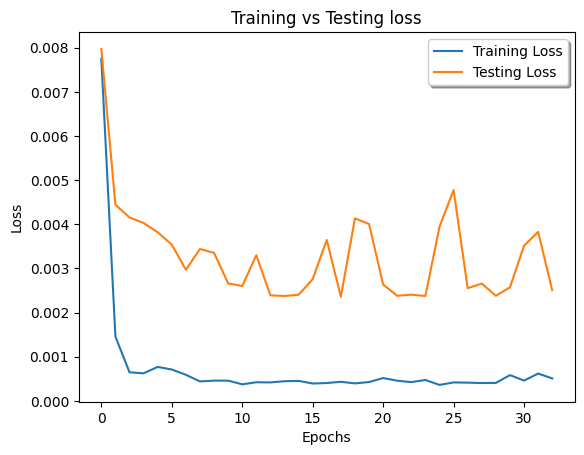

In [24]:
plot_graphs(history_GRU, "loss")

Denormalisasi

In [25]:
train_Y_hat = scaler.inverse_transform(model_GRU.predict(train_X))
test_Y_hat = scaler.inverse_transform(model_GRU.predict(test_X))

2/2 [==============================] - 0s 10ms/step


In [26]:
train_Y = train_Y.reshape(-1, 1)
test_Y = test_Y.reshape(-1, 1)

In [27]:
y_train = scaler.inverse_transform(train_Y)
y_test = scaler.inverse_transform(test_Y)

train_shift = look_back
test_shift = train_shift + len(train_Y_hat) + look_back

In [28]:
train_before_denormalisasi = model_GRU(train_X)
train_before_denormalisasi[:11]
train_after_denormalisasi = train_Y_hat
train_after_denormalisasi[:11]

array([[2355.4248],
       [2204.0466],
       [2079.998 ],
       [2123.1055],
       [2208.5652],
       [2269.1658],
       [2397.5327],
       [2530.6455],
       [2638.6672],
       [2734.2378],
       [2769.712 ]], dtype=float32)

Perbandingan Data Training Sebelum dan Sesudah Denormalisasi

In [29]:
df_train = pd.DataFrame(columns=['Time', 'Sebelum Denormalisasi', 'Setelah Denormalisasi'])
df_train['Time'] = data['Time'][train_shift: test_shift-look_back]
df_train['Sebelum Denormalisasi'] = train_before_denormalisasi
df_train['Setelah Denormalisasi'] = train_after_denormalisasi
df_train

,Time,Sebelum Denormalisasi,Setelah Denormalisasi
12,1994-01-01,0.018562,2355.424805
13,1994-02-01,0.012349,2204.046631
14,1994-03-01,0.007257,2079.998047
15,1994-04-01,0.009026,2123.105469
16,1994-05-01,0.012534,2208.565186
...,...,...,...
295,2017-08-01,0.417940,12085.310547
296,2017-09-01,0.451386,12900.133789
297,2017-10-01,0.476487,13511.655273
298,2017-11-01,0.488376,13801.317383


In [30]:
df_train = pd.DataFrame(columns=['Time', 'Data Aktual', 'Data Prediksi'])
df_train['Time'] = data['Time'][train_shift: test_shift-look_back]
df_train['Data Aktual'] = data['Nonmigas'][:300]
df_train['Data Prediksi'] = train_after_denormalisasi
df_train

,Time,Data Aktual,Data Prediksi
12,1994-01-01,1903.2,2355.424805
13,1994-02-01,2093.0,2204.046631
14,1994-03-01,2280.5,2079.998047
15,1994-04-01,2410.8,2123.105469
16,1994-05-01,2453.3,2208.565186
...,...,...,...
295,2017-08-01,13954.4,12085.310547
296,2017-09-01,13125.2,12900.133789
297,2017-10-01,13764.4,13511.655273
298,2017-11-01,14039.0,13801.317383


Perbandingan Data Testing Sebelum dan Setelah Denormalisasi

In [31]:
test_before_denormalisasi = model_GRU(test_X)
test_before_denormalisasi
test_after_denormalisasi = test_Y_hat
test_after_denormalisasi

array([[13801.526],
       [13492.659],
       [13286.894],
       [12910.205],
       [13139.885],
       [12944.226],
       [13051.288],
       [13213.905],
       [13721.989],
       [14031.139],
       [14129.137],
       [13871.781],
       [13732.867],
       [13507.426],
       [13749.412],
       [13530.777],
       [13221.834],
       [11638.03 ],
       [11607.927],
       [12237.768],
       [12704.375],
       [13159.443],
       [13466.986],
       [14243.523],
       [15266.907],
       [15699.079],
       [15346.659],
       [15795.397],
       [16671.166],
       [16895.127],
       [17105.873],
       [17579.312],
       [18902.559],
       [19870.227],
       [20449.967],
       [21042.05 ],
       [21334.754],
       [20580.723],
       [20133.846],
       [21556.195],
       [23497.916],
       [23042.828],
       [22887.42 ],
       [23996.307],
       [25171.691],
       [25597.371],
       [24526.27 ],
       [23281.996],
       [22506.137],
       [22092.51 ],


In [32]:
df_test = pd.DataFrame(columns=['Time', 'Sebelum Denormalisasi', 'Setelah Denormalisasi'])
df_test['Time'] = data['Time'][test_shift:]
df_test['Sebelum Denormalisasi'] = test_before_denormalisasi
df_test['Setelah Denormalisasi'] = test_after_denormalisasi
df_test

,Time,Sebelum Denormalisasi,Setelah Denormalisasi
312,2019-01-01,0.488385,13801.526367
313,2019-02-01,0.475707,13492.659180
314,2019-03-01,0.467261,13286.893555
315,2019-04-01,0.451799,12910.205078
316,2019-05-01,0.461227,13139.884766
...,...,...,...
370,2023-11-01,0.772515,20723.667969
371,2023-12-01,0.788427,21111.337891
372,2024-01-01,0.798339,21352.804688
373,2024-02-01,0.773825,20755.585938


In [33]:
len(test_after_denormalisasi)

63

In [34]:
df_test = pd.DataFrame(columns=['Time', 'Data Aktual', 'Data Prediksi'])
df_test['Time'] = data['Time'][test_shift:]
df_test['Data Aktual'] = data['Nonmigas'][300:]
df_test['Data Prediksi'] = test_after_denormalisasi
df_test

,Time,Data Aktual,Data Prediksi
312,2019-01-01,12896.8,13801.526367
313,2019-02-01,11737.8,13492.659180
314,2019-03-01,13370.4,13286.893555
315,2019-04-01,12380.0,12910.205078
316,2019-05-01,13697.6,13139.884766
...,...,...,...
370,2023-11-01,20715.3,20723.667969
371,2023-12-01,20913.2,21111.337891
372,2024-01-01,19096.5,21352.804688
373,2024-02-01,18056.7,20755.585938


Plot Aktual dan Prediksi

Text(0.5, 1.0, 'Perbandingan Nilai Aktual dan Prediksi Model Peramalan')

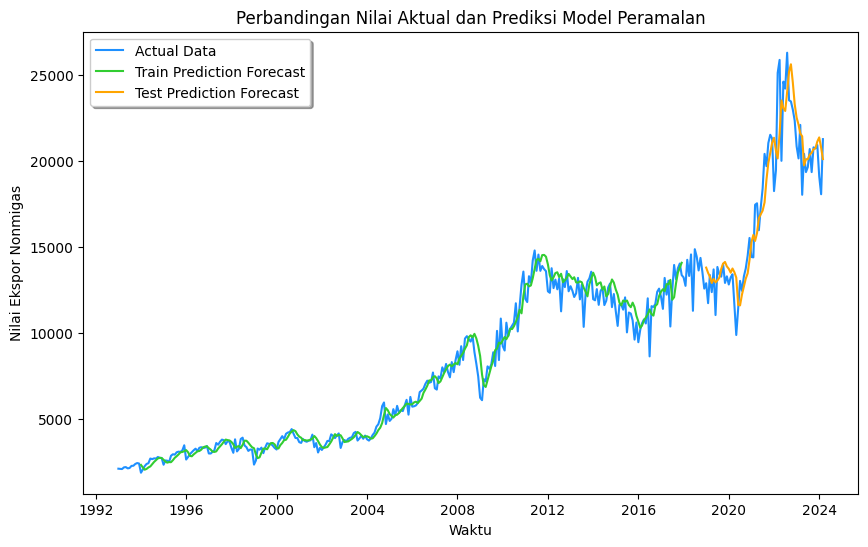

In [35]:
plt.figure(figsize=(10,6))
plt.plot(data['Time'], data['Nonmigas'], color='dodgerblue', label="Actual Data")
plt.plot(data['Time'][train_shift: test_shift-look_back], train_Y_hat, color='limegreen', label="Train Prediction Forecast")
plt.plot(data['Time'][test_shift:], test_Y_hat, color='orange', label="Test Prediction Forecast")
plt.legend(loc='best', shadow=True)

plt.xlabel('Waktu')
plt.ylabel('Nilai Ekspor Nonmigas')
plt.title('Perbandingan Nilai Aktual dan Prediksi Model Peramalan')

MAPE

In [36]:
# Menghitung MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [37]:
# MAPE Training
mape_train = calculate_mape(y_train, train_Y_hat)
print("MAPE Training:", mape_train)

MAPE Training: 6.776618836019217


In [38]:
# MAPE Testing
mape_test = calculate_mape(y_test, test_Y_hat)
print("MAPE Testing:", mape_test)

MAPE Testing: 7.406950654779826


Prediksi Periode Selanjutnya

In [39]:
# Memprediksi 1 tahun ke depan
last_year = normalized_data[-look_back:, :]
forecast = []
for _ in range(12):
    input_data = np.reshape(last_year, (1, look_back, 1))
    next_month_value = model_GRU.predict(input_data)
    forecast.append(next_month_value[0][0])
    last_year = np.concatenate((last_year[1:], next_month_value),axis=0)

1/1 [==============================] - 0s 21ms/step


In [40]:
# Mengubah kembali data prediksi menjadi skala asli
forecast = np.array(forecast)
forecast = forecast.reshape(-1, 1)
forecast = scaler.inverse_transform(forecast)

In [41]:
# 12 bulan kedepan
twelve_month = np.array(['2024-04-01',
                         '2024-05-01',
                         '2024-06-01',
                         '2024-07-01',
                         '2024-08-01',
                         '2024-09-01',
                         '2024-10-01',
                         '2024-11-01',
                         '2024-12-01',
                         '2025-01-01',
                         '2025-02-01',
                         '2025-03-01'], dtype='datetime64')

print(twelve_month)

['2024-04-01' '2024-05-01' '2024-06-01' '2024-07-01' '2024-08-01'
 '2024-09-01' '2024-10-01' '2024-11-01' '2024-12-01' '2025-01-01'
 '2025-02-01' '2025-03-01']


Mencetak Hasil Prediksi

In [42]:
prediction = pd.DataFrame(columns=['Time', 'Nilai Prediksi'])
prediction['Time'] = twelve_month
prediction['Nilai Prediksi'] = forecast
prediction

,Time,Nilai Prediksi
0,2024-04-01,19758.636719
1,2024-05-01,20490.779297
2,2024-06-01,20428.974609
3,2024-07-01,20523.615234
4,2024-08-01,20761.757812
5,2024-09-01,20850.292969
6,2024-10-01,21485.640625
7,2024-11-01,21694.734375
8,2024-12-01,21852.929688
9,2025-01-01,21868.302734


Visualisasi Actual Data, Training Forecast, Testing Forecast, dan Future Forecast

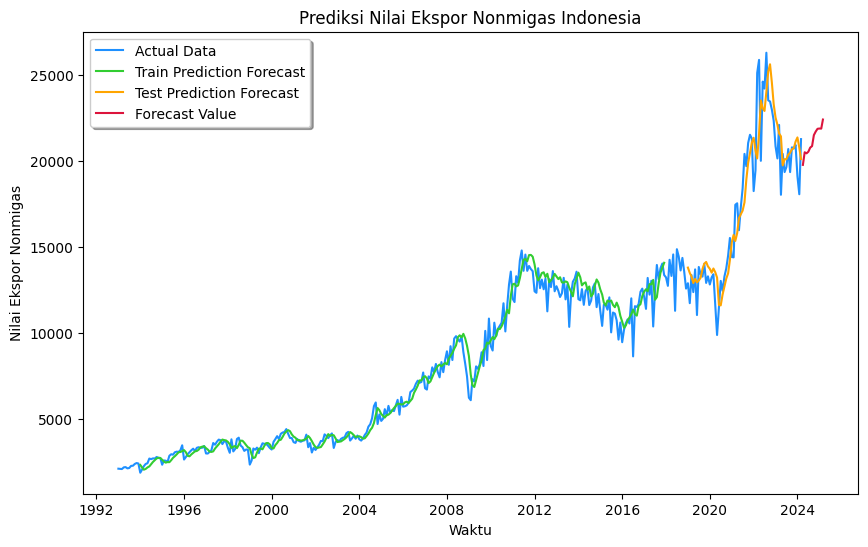

In [43]:
plt.subplots(figsize = (10,6))
plt.plot(data['Time'], data['Nonmigas'], color='dodgerblue', label="Actual Data")
plt.plot(data['Time'][train_shift: test_shift-look_back], train_Y_hat, color='limegreen', label="Train Prediction Forecast")
plt.plot(data['Time'][test_shift:], test_Y_hat, color='orange', label="Test Prediction Forecast")
plt.plot(prediction['Time'], forecast, color='crimson',label='Forecast Value')

plt.title('Prediksi Nilai Ekspor Nonmigas Indonesia')
plt.xlabel('Waktu')
plt.ylabel('Nilai Ekspor Nonmigas')
plt.legend(loc='best', shadow=True)
plt.show()

Visualisasi Data Aktual dan Data Forecast

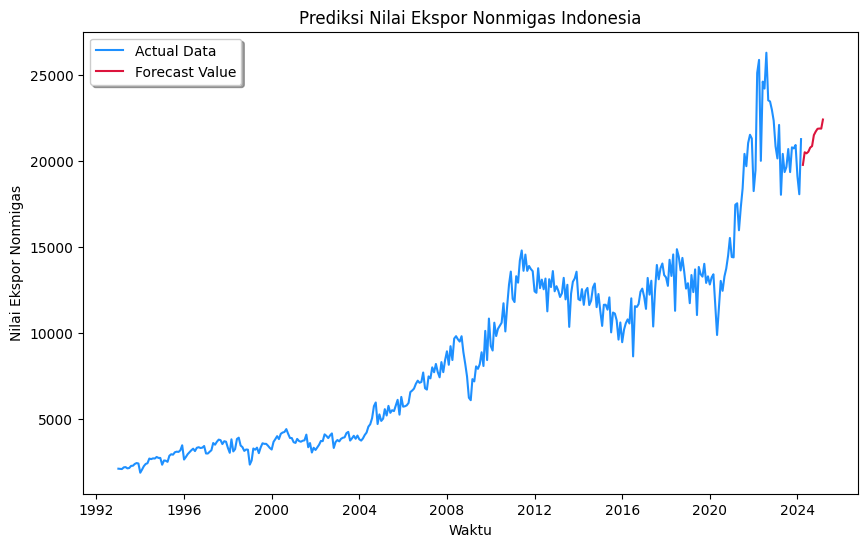

In [44]:
plt.subplots(figsize = (10,6))
plt.plot(data['Time'], data['Nonmigas'], color='dodgerblue', label="Actual Data")
plt.plot(prediction['Time'], forecast, color='crimson',label='Forecast Value')

plt.title('Prediksi Nilai Ekspor Nonmigas Indonesia')
plt.xlabel('Waktu')
plt.ylabel('Nilai Ekspor Nonmigas')
plt.legend(loc='best', shadow=True)
plt.show()